In [1]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import json
import statsmodels.api as sm
from datetime import datetime, timedelta
from pandas.tseries.offsets import Hour,Minute,Day,MonthEnd
import pytz
import matplotlib.pyplot as plt
import random
import string

In [3]:
random.seed(0)
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])
M = 500
df = DataFrame({
    'Mom':np.random.randn(M)/200+0.03,
               'Value':np.random.randn(M)/200+0.08,
               'Short':np.random.randn(M)/200-0.02},
              index = tickers[:M])
ind_names = np.array(['Financial','Tech'])
sampler = np.random.randint(0,len(ind_names),N)
industries = Series(ind_names[sampler],index = tickers,name='industry')
by_industry = df.groupby(industries)
by_industry.mean()
by_industry.describe()
def zscore(group):
    return (group - group.mean())/group.std()
df_stand = by_industry.apply(zscore)
df_stand.groupby(industries).agg(['mean','std'])
by_industry.apply(lambda x: zscore(x.rank()))
f1,f2,f3 = np.random.rand(3,1000)
ticker_subset = tickers.take(np.random.permutation(N)[:1000])
port = Series(0.7*f1-1.2*f2+0.3*f3 + np.random.rand(1000),index = ticker_subset)
fact = DataFrame({
    'f1':f1,'f2':f2,'f3':f3},index = ticker_subset)
fact.corrwith(port)
a = range(2,3,4)

In [4]:
gdp = Series([1.78,1.94,2.08,2.01,2.15,2.31,2.46],
             index=pd.period_range('1984Q2',periods=7,freq='Q-SEP'))
infl = Series([0.025,0.045,0.037,0.04],
              index=pd.period_range('1982',periods=4,freq='A-DEC'))
infl_q = infl.asfreq('Q-SEP',how='end')
rng = pd.date_range('2012-06-01 09:30','2012-06-01 15:59',freq='T')
rng

DatetimeIndex(['2012-06-01 09:30:00', '2012-06-01 09:31:00',
               '2012-06-01 09:32:00', '2012-06-01 09:33:00',
               '2012-06-01 09:34:00', '2012-06-01 09:35:00',
               '2012-06-01 09:36:00', '2012-06-01 09:37:00',
               '2012-06-01 09:38:00', '2012-06-01 09:39:00',
               ...
               '2012-06-01 15:50:00', '2012-06-01 15:51:00',
               '2012-06-01 15:52:00', '2012-06-01 15:53:00',
               '2012-06-01 15:54:00', '2012-06-01 15:55:00',
               '2012-06-01 15:56:00', '2012-06-01 15:57:00',
               '2012-06-01 15:58:00', '2012-06-01 15:59:00'],
              dtype='datetime64[ns]', length=390, freq='T')

2019-01-02    0.651157
2019-01-09   -1.110932
2019-01-16    0.048689
2019-01-23    0.015973
2019-01-30    0.216276
2019-02-06    1.981823
Freq: W-WED, dtype: float64


2019-01-05         NaN
2019-01-16    0.048689
2019-01-19    0.048689
dtype: float64

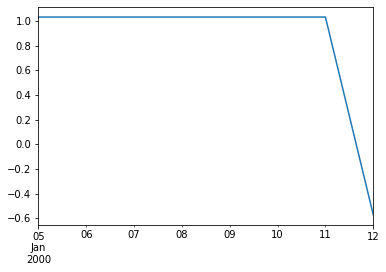

In [5]:
rng = pd.date_range('1/1/2000',periods=12,freq='T')
ts = Series(np.arange(len(rng)),index = rng)
ts.resample('5min').sum()
ts.resample('5min').ohlc()
rng = pd.date_range('1/1/2000',periods=100,freq='D')
ts = Series(np.arange(100),index = rng)
ts.groupby(lambda x: x.month).mean()
ts.groupby(lambda x: x.weekday).mean()
frame = DataFrame(np.random.randn(2,4),index = pd.date_range('1/1/2000',periods=2,freq='W-WED'),
columns= ['C','T','N','O'])
df_daily = frame.resample('D').ffill()
df_daily['C'].plot()

ts1 = Series(np.random.randn(6),index = pd.date_range('1/1/2019',periods=6,freq='W-WED'))
ts1.resample('B').ffill()
print(ts1)
dates = pd.DatetimeIndex(['2019-01-05','2019-01-16','2019-01-19'])
ts2 = Series(np.random.randn(3),index = dates)
ts2
ts1.reindex(ts2.index).ffill()

In [6]:
index = pd.date_range('1/1/2019','1/6/2019')
index = pd.date_range(end = '1/1/2019',periods=5)
index = pd.date_range('1/1/2019','1/6/2019',freq='5H')
index = Hour(2)+Minute(30)
index = pd.date_range('1/1/2019','1/6/2019',freq='5h30min')
index = pd.date_range('1/1/2019','2/10/2019',freq='WOM-3FRI')
index
ts = Series(np.random.randn(4),index=pd.date_range('1/1/2019',periods=4,freq='M'))
ts.shift(2,freq=True)
now = datetime(2019,1,12)
now+3*Day()
now+2*MonthEnd()
now+MonthEnd(2)
now = datetime(2019,1,12)
MonthEnd().rollforward(now)
MonthEnd().rollback(now)
ts = Series(np.random.randn(20),index=pd.date_range('1/1/2019',periods=20,freq='4d'))
ts.groupby(MonthEnd().rollforward).mean()
pytz.common_timezones[-5:]
tz = pytz.timezone('US/Hawaii')
rng = pd.date_range('3/9/2019 9:30',periods=6,freq='D')
ts = Series(np.random.randn(len(rng)),index = rng)
pd.date_range('3/9/2019 9:30',periods=6,freq='D',tz='UTC')
ts_utc = ts.tz_localize('UTC')
ts_utc.tz_convert('US/Hawaii')
stamp = pd.Timestamp('2011-1-9 4:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc.tz_convert('US/Hawaii')
stamp = pd.Timestamp('2011-1-9 4:00',tz='US/Hawaii')
stamp + Hour(3)
p = pd.Period(2007,freq='A-DEC')
rng = pd.period_range('1/1/2019','6/30/2019',freq='M')
Series(np.random.randn(6),index = rng)
rng = pd.period_range('2003Q3','2004Q4',freq='Q-JAN')
ts = Series(np.arange(len(rng)),index=rng)
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s')+16*60
ts.index = new_rng.to_timestamp()
rng = pd.date_range('1/1/2000',periods=3,freq='M')
ts = Series(np.random.randn(3),index = rng)
pts = ts.to_period()
rng = pd.date_range('1/29/2000',periods=6,freq='D')
ts2 = Series(np.random.randn(6),index = rng)
ts2.to_period('M')
print(pts)
pts.to_timestamp(how='end')


TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [7]:
dates = [datetime(2019,1,2),datetime(2019,1,3),datetime(2019,1,4)]
ts = Series(np.random.randn(3),index=dates)
print(ts)
type(ts)
ts.index
ts + ts[::2]
lts = Series(np.random.randn(10),index=pd.date_range('1/1/2019',periods=10))
dates = pd.DatetimeIndex(['1/1/2019','1/2/2019','1/2/2019'])
dup = Series(np.arange(3),index = dates)
group = dup.groupby(level=0)
print(group.count())

2019-01-02   -1.538395
2019-01-03   -0.756012
2019-01-04   -1.367900
dtype: float64
2019-01-01    1
2019-01-02    2
dtype: int64


In [8]:
now = datetime.now()
now.year, now.month, now.day
delta = datetime(2019,1,11)-datetime(2019,1,1)
delta
datetime(2019,1,11) + timedelta(14)
stamp = datetime(2011,1,3)
b = stamp.strftime('%Y-%m-%d')
datetime.strptime(b,'%Y-%d-%m')
datestr = ['2019/1/1','2019/1/11']
ids = pd.to_datetime(datestr+[None])
ids[2]

NaT

In [9]:
df = DataFrame({
    'cata':['a','a','a','a','b','b','b','b'],'data':np.random.randn(8),
               'weight':np.random.rand(8)})
print(df)
a = df.groupby('cata')
a.apply(np.mean)
b = pd.cut(df.data,4)

  cata      data    weight
0    a  0.810928  0.902061
1    a -0.402846  0.608372
2    a -1.765958  0.046529
3    a  0.040526  0.389746
4    b -0.508347  0.714680
5    b -1.933231  0.694486
6    b -0.554901  0.923321
7    b -0.079504  0.311278


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
suits = ['H','S','C','D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_name = ['A'] + list(range(2,11)) + ['J','Q','K']
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_name)
deck = Series(card_val,index=cards)
print(deck[:13])
def draw(deck,n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
dtype: int64


10S    10
AS      1
8C      8
5D      5
7C      7
dtype: int64

In [11]:
a = np.random.permutation(9)
a

array([4, 7, 5, 3, 0, 6, 2, 8, 1])

In [12]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -1.112454
2         NaN
3   -0.644569
4         NaN
5    0.429670
dtype: float64

In [13]:
a = s.fillna(s.mean())
a

0   -0.442451
1   -1.112454
2   -0.442451
3   -0.644569
4   -0.442451
5    0.429670
dtype: float64

In [14]:
frame = DataFrame({
    'data1':np.random.randn(20),'data2':np.random.randn(20)})
factor = pd.qcut(frame.data1,5)
print(factor)
def get_stats(group):
    return {
    'min':group.min(),'max':group.max()}
grouped = frame.data1.groupby(factor,group_keys=False)
grouped.apply(get_stats).unstack()

0                  (-0.842, -0.638]
1                      (0.5, 1.695]
2                  (-0.842, -0.638]
3                      (0.5, 1.695]
4                      (0.5, 1.695]
5                      (0.5, 1.695]
6                  (-0.842, -0.638]
7                  (-0.638, -0.132]
8     (-1.2999999999999998, -0.842]
9     (-1.2999999999999998, -0.842]
10                    (-0.132, 0.5]
11                    (-0.132, 0.5]
12    (-1.2999999999999998, -0.842]
13    (-1.2999999999999998, -0.842]
14                 (-0.638, -0.132]
15                    (-0.132, 0.5]
16                 (-0.638, -0.132]
17                 (-0.638, -0.132]
18                 (-0.842, -0.638]
19                    (-0.132, 0.5]
Name: data1, dtype: category
Categories (5, interval[float64, right]): [(-1.2999999999999998, -0.842] < (-0.842, -0.638] < (-0.638, -0.132] < (-0.132, 0.5] < (0.5, 1.695]]


,min,max
data1,,
"(-1.2999999999999998, -0.842]",-1.299339,-0.892057
"(-0.842, -0.638]",-0.830041,-0.666330
"(-0.638, -0.132]",-0.619111,-0.179675
"(-0.132, 0.5]",-0.061369,0.500049
"(0.5, 1.695]",0.500359,1.695193


In [15]:
data = DataFrame({
    'k1':['one']*3 +['two']*4,'k2':[1,1,2,3,3,4,4]})
data['v1']=range(7)
print(data)
data.drop_duplicates(['k1'])
data.describe()

    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6


,k2,v1
count,7.000000,7.000000
mean,2.571429,3.000000
std,1.272418,2.160247
min,1.000000,0.000000
25%,1.500000,1.500000
50%,3.000000,3.000000
75%,3.500000,4.500000
max,4.000000,6.000000


In [16]:
s1 = Series([0,1,2,3],index=['a','b','c','d'])
print(s1)
s2 = Series([2,3,4,5],index=['b','c','d','e'])
print(s2)
df = pd.concat([s1,s2],keys=['one','two'])
print(df)
df.unstack().stack()

a    0
b    1
c    2
d    3
dtype: int64
b    2
c    3
d    4
e    5
dtype: int64
one  a    0
     b    1
     c    2
     d    3
two  b    2
     c    3
     d    4
     e    5
dtype: int64


one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  b    2.0
     c    3.0
     d    4.0
     e    5.0
dtype: float64

In [17]:
df1 = DataFrame({
    'key1':['f','f','b'],'key2':['o','t','t'],'lval':[1,2,3]})
print(df1)
df2 = DataFrame({
    'key1':['f','f','b','b'],'key2':['o','o','o','t'],'rval':[1,2,3,4]})
print(df2)
pd.merge(df1,df2,on=['key1','key2'],how='outer')

  key1 key2  lval
0    f    o     1
1    f    t     2
2    b    t     3
  key1 key2  rval
0    f    o     1
1    f    o     2
2    b    o     3
3    b    t     4


,key1,key2,lval,rval
0,f,o,1.0,1.0
1,f,o,1.0,2.0
2,f,t,2.0,NaN
3,b,t,3.0,4.0
4,b,o,NaN,3.0


In [18]:
dt = DataFrame(np.random.randn(4,3))
dt.to_csv('cho1.csv')
dt

,0,1,2
0,-0.089977,-0.147468,2.082980
1,0.495763,0.902214,1.934666
2,-0.756519,-0.781135,0.624038
3,1.043106,-0.500973,0.922311


In [19]:
!type cho1.csv

cho1.csv not found


In [20]:
frame = DataFrame(np.arange(6).reshape(3,2),index=[2,0,1])
print(frame)
print(frame.iloc[0])

   0  1
2  0  1
0  2  3
1  4  5
0    0
1    1
Name: 2, dtype: int64


In [21]:
frame = DataFrame(np.random.randn(4,3),columns=list('adc'))
print(frame)
np.fabs(frame)
frame.sort_index(axis=1)

          a         d         c
0 -0.180695 -0.528032  0.927652
1  0.079437  0.030243 -0.298105
2  0.101577 -1.078271  0.062799
3  0.493562  0.300716  0.132579


,a,c,d
0,-0.180695,0.927652,-0.528032
1,0.079437,-0.298105,0.030243
2,0.101577,0.062799,-1.078271
3,0.493562,0.132579,0.300716


In [22]:
o = Series(range(3),index = ['a','d','c'])
print(o)
o.sort_index()

a    0
d    1
c    2
dtype: int64


a    0
c    2
d    1
dtype: int64

In [23]:
from pandas import Series,DataFrame
import pandas as pd
data = {
    'A':[1,2,3],"B":[3,2,1],"C":[0,0,0]}
frame = DataFrame(data)
print(frame)
del frame['C']
frame.iloc[2]

   A  B  C
0  1  3  0
1  2  2  0
2  3  1  0


A    3
B    1
Name: 2, dtype: int64

In [24]:
from pandas import Series,DataFrame
import pandas as pd
def f(x,y,z):
    return (x+y)/z
a = 2
b = 3
c = 5

f(1,2,z=3)

1.0

In [25]:
arr = np.array([3.7,9,2])
brr = arr.astype(np.int32)
brr

array([3, 9, 2], dtype=int32)

In [26]:
a = np.array([1,2,3],dtype=np.int32)
a.dtype

dtype('int32')

In [27]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [28]:
data = np.random.randn(7,4)
data

array([[-0.07793961, -1.31268545, -1.38371149,  0.70249954],
       [-1.09055251,  1.19713777,  0.5641002 , -0.58322413],
       [ 0.2758013 ,  0.02244188, -0.27538706, -0.26233543],
       [-0.32053628,  0.16944034,  2.63222536, -0.43850096],
       [-1.60683233,  0.29201397, -0.39314741,  2.26167295],
       [ 1.32098054, -0.92305393,  0.59666062,  0.02269067],
       [ 1.71341799,  0.86598709,  2.61044213, -1.50477073]])

In [29]:
names = np.array(['A','B','C','B'])
names
names == 'B'

array([False,  True, False,  True])

In [30]:
arr = np.empty((3,2))
arr[[1,1]]

array([[ 9., 16.],
       [ 9., 16.]])

In [31]:
arr = np.arange(16).reshape((2,2,4))
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [32]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [33]:
arr = np.random.randn(7)*5
print(arr)
np.modf(arr)

[-0.96370243 -2.7113431  -2.93036509 -4.136676    1.01324771 -1.12648701
  4.11049803]


(array([-0.96370243, -0.7113431 , -0.93036509, -0.136676  ,  0.01324771,
        -0.12648701,  0.11049803]),
 array([-0., -2., -2., -4.,  1., -1.,  4.]))

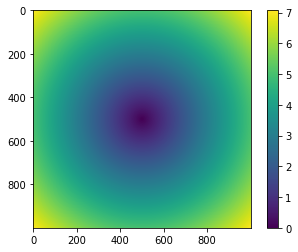

In [34]:
import matplotlib.pyplot as plt
points = np.arange(-5,5,0.01)
x , y = np.meshgrid(points,points)
z = np.sqrt(x**2 + y**2)
plt.imshow(z)
plt.colorbar()
plt.show()

In [35]:
arr = np.random.randn(4,4)
print(arr)
np.where(arr>0,2,-2)

[[ 0.06508154  0.21318218  0.17659455  0.34686141]
 [ 0.78914706  0.31440092 -0.3516241  -1.18431674]
 [-1.52005792 -1.01276149  1.64680508  0.8230662 ]
 [ 1.00698572  0.3307846  -1.12271223  0.89325076]]


array([[ 2,  2,  2,  2],
       [ 2,  2, -2, -2],
       [-2, -2,  2,  2],
       [ 2,  2, -2,  2]])

In [36]:
arr = np.random.randn(5,4)
arr.mean()

-0.36249489020909564

In [37]:
arr= np.arange(10)
np.save('some_array',arr)


In [38]:
np.random.randint(0,4)

0